# Exercise Sheet No. 4

---

> Machine Learning for Natural Sciences, Summer 2025, Jun.-Prof. Pascal Friederich
>
> Upload date: Tuesday 13.05.2025, 8:00 am
>
> Deadline: Monday 19.05.2025, 8:00 am
>
> Tutor: houssam.metni@kit.edu
>
> **Please ask questions in the forum/discussion board and only contact the Tutor when there are issues with the grading**


---

**Topic**:
This exercise sheet (24 points in total) will focus on the basics for ML. You will implement another simple ML algorithm, **linear regression** (LR), instead of decision tree to work on the same task you have already seen in exercise 02. **Gradient descent**, **mean square error loss function**, and **mean absolute error function** are covered in this exercise. And you will learn to use **ridge regression** to control overfitting.

Please add here your group members' names and student IDs.

You are encouraged to work in groups of a maximum of 3 people, however **each of you** has to submit a solution.

Names: Isabella Mebus Kishi de Oliveira, Christopher Roth

IDs: utmce, utxus

# Linear Regression
In assignment 2, we have seen the use of decision tree for breast cancer classification. Now, let's try to solve another classification task with another simple machine learning technique: linear regression (LR).   

As you may have already learned from the lecture, linear regression uses a linear combination of features to predict a target. In our case we can use a linear combination of the four flower descriptors to predict the species.

In this assignment, you will learn to implement the Loss function and Gradient Descent for optimization. Then, we will see that even small model like LR can overfit, and how regularization (ridge regression) can help against this problem.

In [85]:
##### DO NOT CHANGE #####
# package imports

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
from functools import wraps
from typing import List, Dict, Tuple, Optional

warnings.filterwarnings('ignore')

##### DO NOT CHANGE #####

## Preprocessing
Let's start with preprocessing the dataset, as already learned from assignment 2.

In [138]:
##### DO NOT CHANGE #####
#preprocessing functions

def log_name(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        print(f"\n{func.__name__}:")
        return result
    return wrapper

def log_shape(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        print(f"\tshape: {result.shape}")
        return result
    return wrapper

def log_columns(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        print(f"\tcolumns: {result.columns.values}")
        return result
    return wrapper

@log_columns
@log_shape
@log_name
def load(df, path):
    """Loads the dataset from path."""
    df = pd.read_csv(path)
    return df

@log_columns
@log_shape
@log_name
def remove_nan(df):
    for col in df.columns:
        df = df[df[col].notna()]
    return df

@log_columns
@log_shape
@log_name
def convert_to_categorical(df, col_name: str):
    df[col_name] = df[col_name].astype('category')
    return df

@log_columns
@log_shape
@log_name
def add_class_labels(df, target):
    df['class'] = df[target].cat.codes
    return df

##### DO NOT CHANGE #####

In this tutorial, we will be working with the famous "iris" dataset. It contains the characteristics of several different flowers of the iris type, along with the specific iris species. The latter is the target class variable we will be trying to predict

<img src="https://bwsyncandshare.kit.edu/s/Eqtfz5fHnpkiz6s/download" alt="drawing" width="200"/>

In [87]:
##### DO NOT CHANGE #####
import pandas as pd
import requests

url = 'https://bwsyncandshare.kit.edu/s/Bj7dBNAAErNY9ei/download'
response: str = requests.get(url).content.decode('utf-8')

with open('iris.csv', 'w') as file:
    file.write(response)

# reading dataframe and preprocessing it

df = pd.DataFrame()
df = (
    df.pipe(load, 'iris.csv')
      .pipe(convert_to_categorical, 'species')
      .pipe(add_class_labels, 'species')
)

##### DO NOT CHANGE #####


load:
	shape: (150, 5)
	columns: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']

convert_to_categorical:
	shape: (150, 5)
	columns: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']

add_class_labels:
	shape: (150, 6)
	columns: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species'
 'class']


## Plot the data
It is always a good practice to have some inspection on the dataset. This provides us with information about the data such as its structure, range, outliers etc., which may help on the design of ML algorithm. There are numerous ways to visualize data, and introduced here is a histogram visualization. This can be implemented easily with the [seaborn](https://seaborn.pydata.org/generated/seaborn.histplot.html) library. Here we used it to show the distribution of the features, distinguished by the target variable.

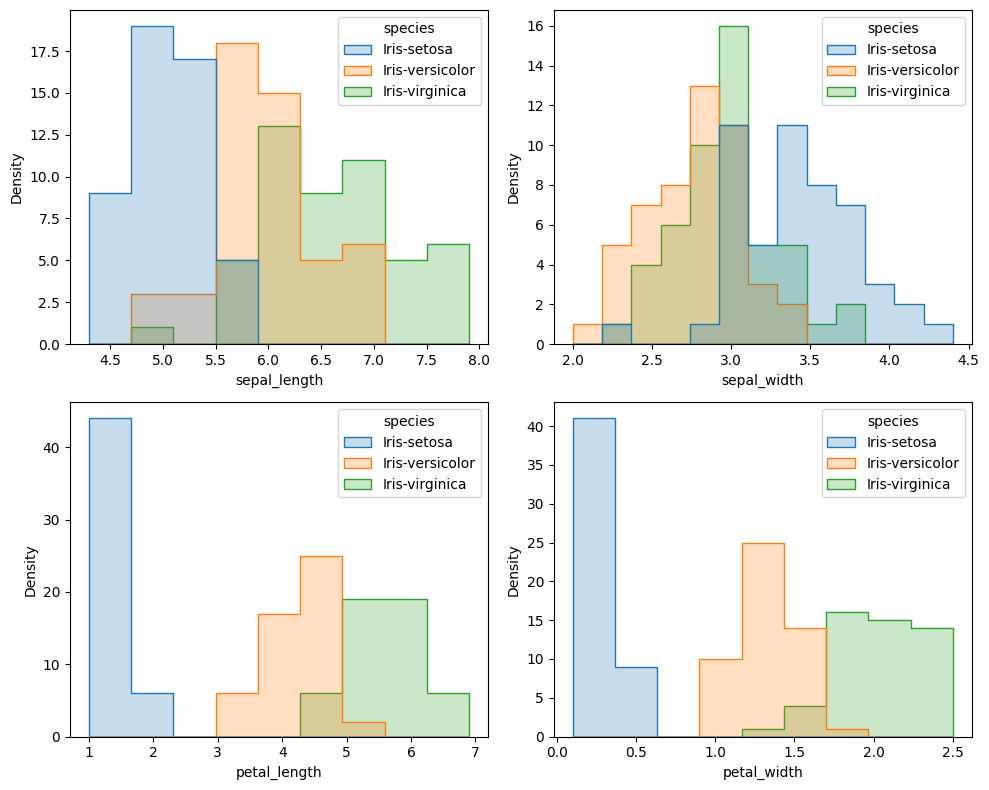

In [88]:
##### DO NOT CHANGE #####
# visualizing the data

import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot distribution plots for each numeric column, colored by 'species'
for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    sns.histplot(df, x=column, hue='species', element="step", ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

##### DO NOT CHANGE #####

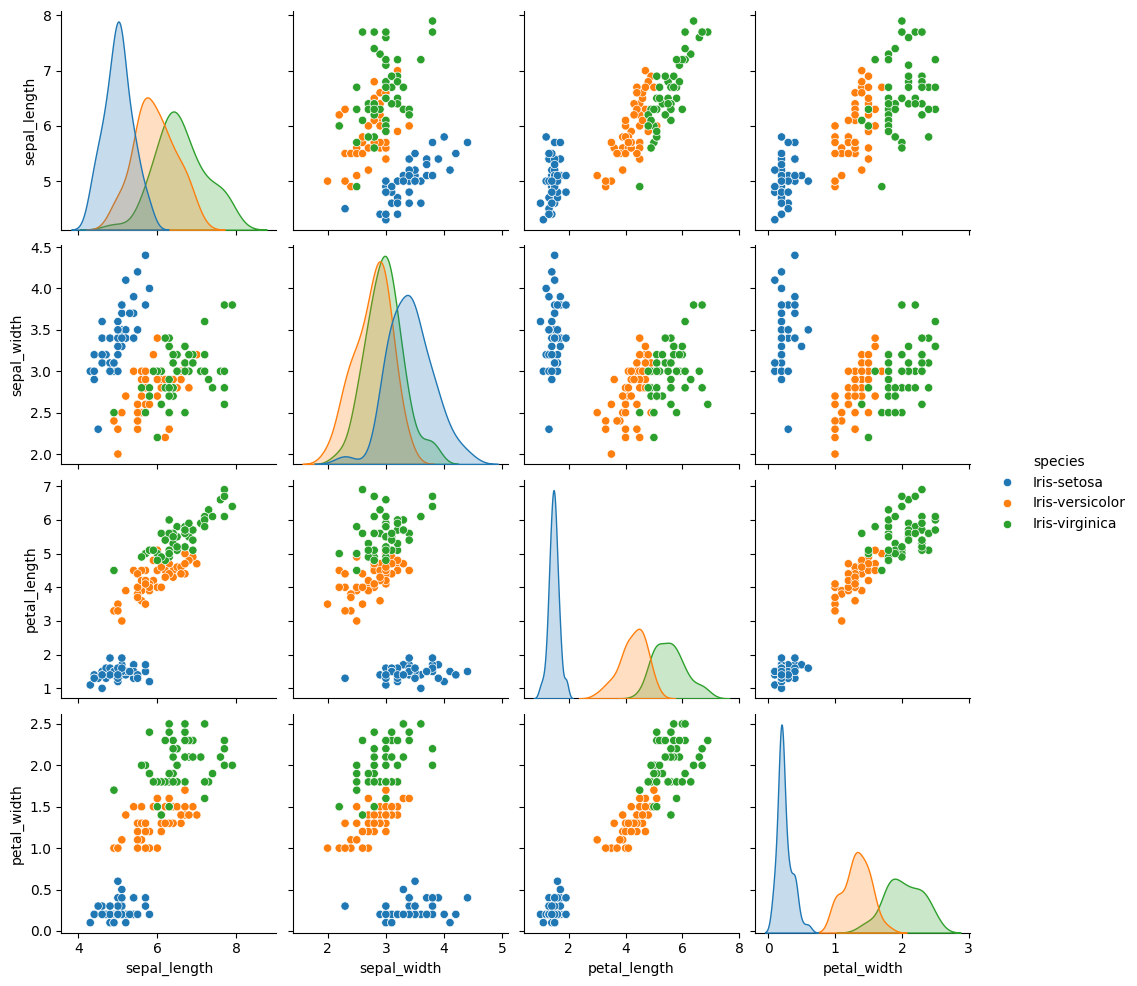

In [89]:
##### DO NOT CHANGE #####
# another way of visualizing the data

sns.pairplot(df.loc[:,:'species'], hue= 'species')
plt.show()

##### DO NOT CHANGE #####

**Question**: from the plots above, which pair of features are the most likely to be correlated?

**1.** petal_length and sepal_width   

**2.** sepal_width and petal_width

**3.** petal_length and petal_width

**4.** sepal_width and sepal_length

**5.** sepal_length and petal_width


Assign the number of your choice to the variable `A`. It should be an integer value.

In [90]:
# Task 1: select the correct choice. (1 point in total)

A: int = 3
# YOUR CODE HERE
#raise NotImplementedError()


In [91]:
##### DO NOT CHANGE #####
# ID: Histogram-test - possible points: 1

assert isinstance(A, int), (
    "Your answer has to be an integer!"
)

assert A in [1, 2, 3, 4, 5], (
    "Your answer has to be one of the available options."
)

# Hidden test will check for the correct answer.
# 1 point for correct answer

##### DO NOT CHANGE #####

## Separate features from the target
Now, for our machine learning task, let's extract feature matrix `X` and label matrix `Y` from the dataframe `df`. Please implement the `split_X_Y` function that returns feature `X` as a $150 \times 4$ numpy array, as well as label `Y` as a $150 \times 1$ numpy array. `X` should contain values from columns 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' (**Please make sure to follow this order for grading purpose, or use the above-defined variable `numeric_columns`**). `Y` should be the value of column "class". You may use methods such as `.reshape()` to reshape an array, and attributes like `.values` to access values in columns of the data frame.

In [92]:
# Task 2: Implement split_X_Y. (2 points in total)

def split_X_Y(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """
    split the dataframe into feature matrix X and label matrix Y

    Args:
        df (pandas.DataFrame): shape (150, 6)

    Returns:
        X (numpy.ndarray): array containing values of 4 features of the dataframe. Shape (150, 4)
        Y (numpy.ndarray): array containing target value in the column "class". Shape (150, 1)
    """
    X: np.ndarray = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values # please update this in your solution
    Y: np.ndarray = df['class'].values.reshape(-1, 1) # please update this in your solution
    # YOUR CODE HERE
    return X, Y

In [93]:
##### DO NOT CHANGE #####
# ID: Train_Test_Split-test_1 - possible points: 1

# feature/target split
X, Y = split_X_Y(df)

assert isinstance(X, np.ndarray), (
    "X has to be a numpy array!"
)
assert isinstance(Y, np.ndarray), (
    "Y has to be a numpy array!"
)

# 1 point for correct shape of X and Y
assert X.shape == (150, 4), (
    "X has to have shape (150, 4)!"
)
assert Y.shape == (150, 1), (
    "Y has to have shape (150, 1)!"
)


##### DO NOT CHANGE #####

In [94]:
##### DO NOT CHANGE #####
# ID: Train_Test_Split-test_2 - possible points: 1


# Hidden tests will check for the correct values in X and Y

##### DO NOT CHANGE #####

We have learned that the linear model tries to fit the function:
\begin{align}
y = \omega^T x + \omega_0 = \sum^n_{i=1} \omega_i x_i + \omega_0
\end{align}
Where $\omega$ is the weight matrix and $\omega_0$ is the bias term. Let $x_0 = 1$, this function can be rewritten into:
\begin{align}
y =  \sum^n_{i=1} \omega_i x_i + \omega_0 x_0 = \sum^n_{i=0} \omega_i x_i = X \Omega^T
\end{align}
$\Omega$ can be initialized randomly, and optimized later through training. In our case $\Omega$ has five elements - the first one for the bias and rest four for the weights of the four features.

**Please note that $\Omega$ is written as a row vector in many text books for display convenience and is actually a column vector during implementation. That's why we have $\Omega^T$ in the equation to denote the convertion. Here we use `numpy.T` to make our code and equation consistent.**

In [95]:
##### DO NOT CHANGE #####
# random initialization for weights and bias
np.random.seed(0)
omega = np.random.randn(1,5)
omegaT = omega.T
omegaT

##### DO NOT CHANGE #####

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ],
       [1.86755799]])

## Generate training/validation/test sets

Firstly, let's do a train-valid split for our dataset. Just to refresh your memory, training set is used for training to improve our model performance, while validation set tests the model with unseen data (recall from the lecture that they should be drawn from the same distribution). Testing our model with validation set is crucial especially when we want to know the generalization ability of the model.

The `x_train` and `y_train` will be our training set, and `x_val`, `y_val` will be our validation set. This time, we are adding a third set, that we call the test set, consisting of `x_test` and `y_test`. Adding this last test set is optional, as it can be counted towards the validation set. However, it is of common practice to add a test set (separate from the validation set that we visualize during training) as a final test of our model.  You will see more details later in the Overfitting & Ridge regression section.

Here we randomly shuffle the dataset and take $105$ ($70\%$) data points as training set. We use $30$ points for validation (about $20\%$), and the rest $15$ ( about $10\%$) are used as a final test set. There's also a useful method `sklearn.model_selection.train_test_split()` from scikit-learn for the same purpose (for splitting into a train and validation set, the latter of which can be further divided to have a validation and a final test set). You can find its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [96]:
##### DO NOT CHANGE #####
# train-val-test splitting

idx = list(range(0, 150))

train_size = 105
val_size = 30
test_size = 150 - (train_size+val_size)
random.shuffle(idx)

# train set
x_train = X[idx[:train_size]]
y_train = Y[idx[:train_size]]

# validation set
x_val = X[idx[train_size:train_size+val_size]]
y_val = Y[idx[train_size:train_size+val_size]]

# test set
x_test = X[idx[train_size+val_size:]]
y_test = Y[idx[train_size+val_size:]]

##### DO NOT CHANGE #####

## Gradient Descent
For more complex tasks, a closed form solution often doesn't exist and hence we will introduce another approach here, aka Gradient Descent (GD) algorithm, to solve the linear regression. Gradient Descent works by updating the weight vector incrementally after each epoch. Read more [here](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent).

In case you are interested, there's a "closed-form solution" that estimates the best parameter set $\Omega^*$ by solving the equation:
\begin{align}
\Omega^* = (X^TX)^{-1}X^Ty
\end{align}
Watch this [video](https://www.coursera.org/lecture/ml-regression/approach-1-closed-form-solution-G9oBu) from coursera for detailed explanation.

As a first step lets concatenate a new column tou our feature matrix `X` to represent the bias term $x_0 = 1$. By adding this constant value, we obtain the feature matrix `x_train` that will server as the input for the LR model.

Please do this by stacking a new column to `x_train`, `x_val` and `x_test` as the *first* colunm with all values equal to $1$. This may be easily implemented with the numpy method `.hstack()` ([Documentation](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)).

You can also use the variables `train_size`, `val_size` and `test_size` defined earlier for the dimensions of your array.

In [97]:
# Task 3: stack to x_train, x_val and x_test a new column with value 1. (2 points in total)

# Update feature matrix x_train with x0 = 1
x_train: np.ndarray = np.hstack((np.ones((train_size, 1)), x_train))
# YOUR CODE HERE

# Update feature matrix x_val with x0 = 1
x_val: np.ndarray = np.hstack((np.ones((val_size, 1)), x_val))
# YOUR CODE HERE

# Update feature matrix x_test with x0 = 1
x_test: np.ndarray = np.hstack((np.ones((test_size, 1)), x_test))
# YOUR CODE HERE


In [98]:
##### DO NOT CHANGE #####
# ID: Add_bias_term_to_X-test_1 - possible points: 1

# 1 point for correct shape of x_train after stacking

# now the shape of x_train should change from (train_size, 4) to (train_size, 5)
assert x_train.shape == (train_size, 5)

# now the shape of x_val should change from (val_size, 4) to (val_size, 5)
assert x_val.shape == (val_size, 5)

# now the shape of x_test should change from (test_size, 4) to (test_size, 5)
assert x_test.shape == (test_size, 5)

##### DO NOT CHANGE #####

In [99]:
##### DO NOT CHANGE #####
# ID: Add_bias_term_to_X-test_2 - possible points: 1

# values in X are checked
assert np.isclose(x_train[:, 0], 1).all()
assert np.isclose(x_val[:, 0], 1).all()
assert np.isclose(x_test[:, 0], 1).all()

##### DO NOT CHANGE #####

### Cost function

The mean squared error (mse) is a common loss function that measures the average squared difference between predict and real values. Here, it is defined as:

\begin{align}
MSE = \frac{1}{2n}\sum^n_{i=1}(\text{y_pred}_i - \text{y_real}_i)^2
\end{align}
The $\frac{1}{2}$ in equation is just for convenience when computing the gradient (see next step). Recall that $y = X \Omega^T$, so we have:
\begin{align}
MSE = \frac{1}{2n}\sum^n_{i=1}(x_i \Omega^T - \text{y_real}_i)^2
\end{align}
Please implement the `mean_square_error()` that returns MSE. Methods/attribute you may need are `numpy.sum()` and `numpy.dot()`.

In [100]:
# Task 4: implement MSE function. (2 points in total)

def mean_square_error(x: np.ndarray, y: np.ndarray, omegaT: np.ndarray) -> float:
    """
    return the mean squared error.

    Args:
        x (numpy.ndarray): numpy array of features (n data points, m features). Shape (n, m)
        y (numpy.ndarray): numpy array of corresponding targets. Shape (n, 1)
        omegaT (numpy.ndarray): weight vector (transposed). Shape (m, 1)

    Returns:
        mse (numpy.float64 or float): mean squared error.
    """
    n = x.shape[0]  # Number of data points
    y_pred = x.dot(omegaT)  # Predictions
    mse = (1/(2*n)) * np.sum(np.square(y_pred - y))  # Calculate MSE

    # YOUR CODE HERE

    return mse

In [101]:
##### DO NOT CHANGE #####
# ID: MSE-test_1 - possible points: 1

import numpy as np

# 1 point: a simple test to check if your mse function works
a = np.array([[1.0, 2.0], [2.0, 2.0]])
b = np.array([[1.0], [2.0]])
w = np.array([[1.0, 1.0]]).T

result = mean_square_error(a, b, w)

assert np.isclose(result, 2.0), (
    "Your result is likely not correct. Please check your implementation again."
)
assert isinstance(result, (float, np.ndarray)), (
    "Your result has to be a native float or a numpy float type!"
)


##### DO NOT CHANGE #####

In [102]:
##### DO NOT CHANGE #####
# ID: MSE-test_2 - possible points: 1

# Hidden test below
# 1 point: further tests to check the output of the mse function using tensor inputs.


##### DO NOT CHANGE #####

After each epoch $t$, the Gradient Descent algorithm updates the weight vector in the direction of the negative gradient in order to reduce the cost function. The gradient is simply the partial derivative of mean squared error to the weight.

You can deduce the derivative yourself for practice. Just run the following cell to render the answer:

In [103]:
from IPython.display import display, Markdown

display(Markdown("\\begin{align}"
                 "\\frac{\\partial MSE}{\\partial \\Omega^T} &= "
                 "\\frac{1}{n} \\sum^n_{i=0}(x_i \\Omega^T - \\text{y_real}_i) x_i^T \\\\"
                 "\\Omega^T(t+1) &= \\Omega^T(t) - \\alpha \\frac{\\partial MSE}{\\partial \\Omega^T(t)}"
                 "= \\Omega^T(t) - \\frac{\\alpha}{n} \\sum^n_{i=0}(x_i \\Omega^T - \\text{y_real}_i) x_i^T"
                 "\\end{align}"))

\begin{align}\frac{\partial MSE}{\partial \Omega^T} &= \frac{1}{n} \sum^n_{i=0}(x_i \Omega^T - \text{y_real}_i) x_i^T \\\Omega^T(t+1) &= \Omega^T(t) - \alpha \frac{\partial MSE}{\partial \Omega^T(t)}= \Omega^T(t) - \frac{\alpha}{n} \sum^n_{i=0}(x_i \Omega^T - \text{y_real}_i) x_i^T\end{align}

The $\alpha$ parameter is the learning rate that controls the step size for the update after each iteration.

Please implement the `weight_update_function()` that returns updated $\Omega^T$. Methods/attribute you may need are `numpy.dot()` and `numpy.reshape()`.

In [104]:
# Task 5: implement weight update function. (2 points in total)

def weight_update_function(x: np.ndarray, y: np.ndarray, omegaT: np.ndarray, alpha: float) -> np.ndarray:
    """
    return updated set of weights

    Args:
        x (numpy.ndarray): numpy array of features (n data points, m features). Shape (n, m)
        y (numpy.ndarray): numpy array of corresponding targets. Shape (n, 1)
        omegaT (numpy.ndarray): weight vector (transposed). Shape (m, 1)
        alpha (float): learning rate.

    Returns:
        omega_updated (numpy.ndarray): the updated weight vector. Shape (m, 1)
    """
    n = x.shape[0] # Number of data points

    # Calculate the predictions
    y_pred = x.dot(omegaT)

    # Calculate the error
    error = y_pred - y

    # Calculate the gradient
    gradient = (1/n) * x.T.dot(error)

    # Update the weights
    omega_updated = omegaT - alpha * gradient

    # YOUR CODE HERE

    return omega_updated

In [105]:
##### DO NOT CHANGE #####
# ID: Gradient_Descent-test_1 - possible points: 1

# 1 points: check the output value and shape of your weight_update_function

a = np.array([[1.0, 2.0], [2.0, 2.0]])
b = np.array([[1.0], [2.0]])
w = np.array([[1.0, 1.0]]).T

result = weight_update_function(x=a, y=b, omegaT=w, alpha=0.001)
print(result)

import numpy as np
assert result.shape == w.shape
assert np.allclose(result, np.array([[0.997], [0.996]])), (
    'Your result is likely not correct. Please check your implementation again.'
)


##### DO NOT CHANGE #####

[[0.997]
 [0.996]]


In [106]:
##### DO NOT CHANGE #####
# ID: Gradient_Descent-test_2 - possible points: 1

# Hidden test below
# 1 point: further tests to check the output of the weight_update_function function


##### DO NOT CHANGE #####

### Training & plot
To monitor the training process, we could also use the mean absolute error (mae):
\begin{align}
MAE = \frac{1}{n}\sum^n_{i=1} |\text{y_pred}_i - \text{y_real}_i|
\end{align}
Please implement the `mean_absolute_error()` that returns MAE. Methods/attribute you may need are `numpy.sum()`, `numpy.dot()` and `numpy.abs()`.

In [107]:
# Task 6: implement mean absolute function. (2 points in total)

def mean_absolute_error(x: np.ndarray, y: np.ndarray, omegaT: np.ndarray) -> float:
    """
    return the mean absolute error

    Args:
        x (numpy.ndarray): numpy array of features (n data points, m features). Shape (n, m)
        y (numpy.ndarray): numpy array of corresponding targets. Shape (n, 1)
        omegaT (numpy.ndarray): weight vector (transposed). Shape (m, 1)

    Returns:
        mse (numpy.float64 or float): mean absolute error.
    """
    n = x.shape[0]
    y_pred = x.dot(omegaT)
    mae = (1/n) * np.sum(np.abs(y_pred - y))

    # YOUR CODE HERE

    return mae

In [108]:
##### DO NOT CHANGE #####
# ID: MAE-test_1 - possible points: 1

# 1 points: check the output value and shape of your mean_absolute_error function

a = np.array([[1.0, 2.0], [2.0, 2.0]])
b = np.array([[1.0], [2.0]])
w = np.array([[1.0, 1.0]]).T

result = mean_absolute_error(a, b, w)

assert isinstance(result, (float, np.ndarray)), (
    "Your result has to be a native float or a numpy float type!"
)
assert np.isclose(result, 2.0), (
    "Your result is likely not correct. Please check your implementation again."
)


##### DO NOT CHANGE #####

In [109]:
##### DO NOT CHANGE #####
# ID: MAE-test_2 - possible points: 1

# Hidden test below
# 1 point: further tests to check the output of the mean_absolute_error function


##### DO NOT CHANGE #####

For the last step before training the model, let's set up the learning rate and number of iterations. We use `J_train` and `J_val` to record mean squared errors for each epoch of the training and validation processes.

In [110]:
##### DO NOT CHANGE #####
# defining parameter values

# The number of iterations in which to iteratively update the weights
epochs: int = 10000 # aka omegaT

# The learning rate, which determines how much to adjust the weights
# during each update iteration.
alpha: float = 0.001 # learning rate

# In this array we'll record the training MSE value indexed by each epoch
J_train: np.ndarray = np.zeros(epochs)

# In this array we'll record the validation MSE value indexed by each epoch
J_val: np.ndarray = np.zeros(epochs)

##### DO NOT CHANGE #####

Now, let's train our model by updating `omegaT` with the `weight_update_function()` and record mean squared errors through `mean_square_error()` for the training/validation process.

In [111]:
# Task 7: implement the training process. (3 points in total)

# At the beginning of the training process we'll randomly initilize the weights for the
# five parameters (4 features + bias) in our linear regression model.
np.random.seed(0)
omegaT = np.random.randn(1, 5).T

# In the training loop, we'll iteratively update these weights based on the objective
# function and the gradients calculated from the training data.
for i in range(epochs):

    # Record the current MSE for the training set in this variable
    J_val[i] = mean_square_error(x_val, y_val, omegaT)

    # Record the current MSE for the validation set in this variable
    J_train[i] = mean_square_error(x_train, y_train, omegaT)

    # Perform the weight update for the next epoch
    omegaT = weight_update_function(x_train, y_train, omegaT, alpha)
    # YOUR CODE HERE

# At the end of the training process, we'll have a set of weights that minimize the
# MSE for the training data. These weights can be used to make predictions on new data
# or to evaluate the performance of the model on a test set.

In [112]:
##### DO NOT CHANGE #####
# ID: Train_Loop-test_1 - possible points: 2

# 2 point: check the results of the training process

assert np.std(J_val[-10:]) <= 1e-3, (
    'The training process seems not to be converging. The variance within the later epochs is too high.'
)


##### DO NOT CHANGE #####

In [113]:
##### DO NOT CHANGE #####
# ID: Train_Loop-test_2 - possible points: 1

# Hidden tests below
# 1 point: further tests for the training/validation results

##### DO NOT CHANGE #####

Here the `plot_training_curve()` is implemented to visualize the training process.

In [114]:
##### DO NOT CHANGE #####
# defining plot training curve function

def plot_training_curve(mse_train: np.ndarray,
                        mse_val: np.ndarray,
                        epochs: int,
                        ylim: Tuple[float, float] = (0, 1)
                        ) -> None:
    """
    Plot the mean squared error for training/validation process.

    Args:
        mse_train (numpy.ndarray): array of shape (epochs, ) which records the
            mean squared error for training process.
        mse_val (numpy.ndarray): array of shape (epochs, ) which records the
            mean squared error for validation process.
        epochs (int): number of epochs.

    Returns:
        None
    """

    fig, ax = plt.subplots(figsize=(7.5, 5))
    ax.plot(np.arange(epochs), mse_train, label='Training')
    ax.plot(np.arange(epochs), mse_val, label='Validation')
    ax.set_ylim(ylim)
    ax.set_ylabel("Mean Squared Error")
    ax.set_xlabel("Epochs")
    ax.set_title("Mean Squared Error vs Epochs")
    ax.legend(loc='upper right')
    plt.show()

##### DO NOT CHANGE #####

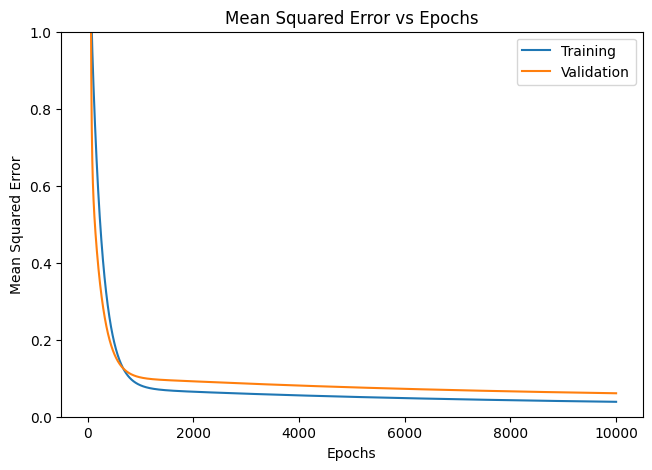

In [115]:
##### DO NOT CHANGE #####
# plotting the training curve

plot_training_curve(
    mse_train=J_train,
    mse_val=J_val,
    epochs=epochs
)

##### DO NOT CHANGE #####

### Accuracy
Now, with the optimized weight vector, let's implement `prediction()` to get the predicted class labels from our linear model. You may need `numpy.dot()` for the computation, and `numpy.round()` to round up the results into integers (because our class labels are integer 0, 1, 2).

In [116]:
# Task 8: implement prediction function. (1 point in total)

def prediction(x: np.ndarray, omegaT: np.ndarray) -> np.ndarray:
    """
    Return predicted labels.

    Args:
        x (numpy.ndarray): the feature matrix (n data points, m features). Shape (n, m)
        omegaT (numpy.ndarray): optimized weight vector (transposed). Shape (m, 1)

    Returns:
        y_pred (numpy.ndarray): predicted labels. Shape (n, 1)
    """
    y_pred: np.ndarray = np.round(x.dot(omegaT)) # please update this in your solution
    # YOUR CODE HERE
    return y_pred

In [117]:
##### DO NOT CHANGE #####
# ID: Prediction-test - possible points: 1

import numpy as np

y_pred: np.ndarray = prediction(x_test, omegaT)
assert isinstance(y_pred, np.ndarray), (
    "Your prediction should a numpy array!"
)
assert y_pred.shape == y_test.shape, (
    "The shape of your prediction should match the shape of the true values!"
)
assert np.all(np.mod(y_pred, 1) == 0), (
    "All entries of the prediction array should be integers by value!"
)


##### DO NOT CHANGE #####

Please implement `accuracy()` that calculates the prediction accuracy.

Hint: prediction accuracy is computed by counting the number of predictions that match the real values, and then devide by the number of total instances.

In [118]:
# Task 9: implement accuracy function. (1 point in total)

def accuracy(y_pred: np.ndarray, y: np.ndarray) -> float:
    """
    Compute the accuracy of prediction.

    Args:
        y_pred (numpy.ndarray): the predicted class labels for n data points. Shape (n, 1)
        y (numpy.ndarray): the real class labels. Shape (n, 1)

    Returns:
        acc (numpy.float64 or float): calculated accuracy in float.
    """
    n = y_pred.shape[0] # number of data points
    acc =  np.sum(y_pred == y) / n # please update this in your solution
    # YOUR CODE HERE

    return acc

In [119]:
##### DO NOT CHANGE #####
# printing accuracy
acc = accuracy(y_pred, y_test)
print(acc)

##### DO NOT CHANGE #####

0.8666666666666667


In [120]:
##### DO NOT CHANGE #####
# ID: Accuracy-test - possible points: 1

import numpy as np

y_pred: np.ndarray = prediction(x_test, omegaT)
acc = accuracy(y_pred, y_test)

assert isinstance(acc, (float, np.float64)), (
    "Your accuracy should be a native float or a numpy float type!"
)

# Hidden test will check if the accuracy function has been implemented correctly.

##### DO NOT CHANGE #####

### Visualize predictions vs ground truth
For the last step, let's visualize how well our model has performed. We are using a tool called confusion_matrix.
This method is useful to know how many of the classes were correctly and incorrectly identified.
You can read more about it here : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

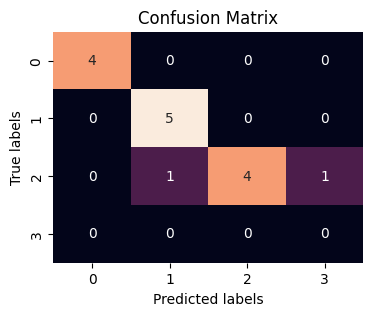

In [121]:
##### DO NOT CHANGE #####
# visualizing a confusion matrix

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### DO NOT CHANGE #####

Please feel free to play around with the model and training process. You may adjust the learning rate and number of epochs to see how the training curve changes (do not forget to re-initialize the weight vector). You may also try different train-validation split ratio to see the effect.

You may notice that the training results differ a lot with different hyperparameters (learning rate, omega initialization, etc.). This is one limitation of such simple ML model. Later in this semester, you will see and implement more sophisticated ML algorithms that can make more stable and accurate predictions.

## Overfitting & Ridge regression

When finishing the first part of the tutorial, you may (and may not, depending on the training set setup) sometimes observe the gap between the training curve and validation curve (validation error higher than training error) that cannot be diminished by increasing the number of epochs. This phenomenon is known as "overfitting". It happens when the model gets too complex so that it fits the training set perfectly, but loses the generalization ability towards unseen data from validation/test set.

Ridge regression, also known as L2 regularization, is a useful technique to restrict our model from getting too complicated and reduce the effect of overfitting. It works by simply adding a penalty term to the cost function. In our case, the penalty term is $||\Omega||_2^2$ (the square of the $L^2$ norm). It prefers lower absolute values of weights thus reduces the model complexity. For more information, please refer to [here](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization).

By introducting the penalty term, our cost function becomes:
\begin{align}
MSE = \frac{1}{2}(\frac{1}{n}\sum^n_{i=1}(\text{y_pred}_i - \text{y_real}_i)^2 + \lambda ||\Omega^T||_2^2)
\end{align}
$\lambda$ is the coefficient to adjust the regularization effect.

While the mean absolute error calculation stays the same, the weight update function becomes:
\begin{align}
\Omega^T = \Omega^T - \alpha \frac{\partial MSE}{\partial \Omega^T} = \Omega^T - \alpha(\frac{1}{n} \sum^n_{i=0}(x_i \Omega^T - \text{y_real}_i) x_i + \lambda \Omega^T)
\end{align}
Now, please implement the new cost function `mean_square_error_ridge()` and `weight_update_function_ridge()` with the penalty term. You may use `mean_square_error()` and `weight_update_function()` that are implemented earlier as references. You may also need `np.square` and `np.sqrt` to calculate square and square root.

In [122]:
# Task 10: implement L2 regularization. (2 points in total)

def mean_square_error_ridge(x, y, omegaT, lam):
    """
    return the mean suqared error.

    Args:
        x (numpy.ndarray): numpy array of features (n data points, m features). Shape (n, m)
        y (numpy.ndarray): numpy array of corresponding targets. Shape (n, 1)
        omegaT (numpy.ndarray): weight vector (transposed). shape (m, 1)
        lam (float): ridge regression coefficient.

    Returns:
        mse (numpy.float64 or float): mean squared error.
    """
    n = x.shape[0]
    y_pred = x.dot(omegaT)
    mse = (1/2)*((1/n) * np.sum(np.square(y_pred - y)) + lam * np.sum(np.square(omegaT)))

    # YOUR CODE HERE

    return mse

In [123]:
##### DO NOT CHANGE #####
# ID: Ridge_function-test - possible points: 1

# 1 point: check the output value
a = np.array([[1.0, 2.0], [2.0, 2.0]])
b = np.array([[1.0], [2.0]])
w = np.array([[1.0, 1.0]]).T

result = mean_square_error_ridge(a, b, w, 0.1)
assert np.isclose(result, 2.1), (
    "Your result is likely not correct. Please check your implementation again."
)


##### DO NOT CHANGE #####

In [124]:
def weight_update_function_ridge(x: np.ndarray,
                                 y: np.ndarray,
                                 omegaT: np.ndarray,
                                 alpha: float,
                                 lam: float
                                 ) -> np.ndarray:
    """
    return updated set of weights

    Args:
        x (numpy.ndarray): numpy array of features (n data points, m features). Shape (n, m)
        y (numpy.ndarray): numpy array of corresponding classes. Shape (n, 1)
        omegaT (numpy.ndarray): weight vector (transposed). Shape (m, 1)
        alpha (float): learning rate.
        lam (float): ridge regression coefficient.

    Returns:
        omega_updated (numpy.ndarray): the updated weight vector (transposed). Shape (m, 1)
    """
    n = x.shape[0]
    gradient = (1/n) * x.T.dot(x.dot(omegaT) - y)
    omega_updated = omegaT - alpha*(gradient + lam * omegaT) # please update this in your solution

    # YOUR CODE HERE

    return omega_updated

In [125]:
##### DO NOT CHANGE #####
# ID: Ridge_update_function-test - possible points: 1

import numpy as np

a = np.array([[1.0, 2.0], [2.0, 2.0]])
b = np.array([[1.0], [2.0]])
w = np.array([[1.0, 1.0]]).T

result = weight_update_function_ridge(a, b, w, alpha=0.001, lam=0.1)
print('result', result)

assert w.shape == result.shape, (
    'The shape of the updated weights should be the same as the shape of the original weights!'
)
assert np.allclose(result, np.array([[0.9969], [0.9959]])), (
    'Your result is likely not correct. Please check your implementation again.'
)

# Hidden tests check additional tests cases for the ridge regression

##### DO NOT CHANGE #####

result [[0.9969]
 [0.9959]]


Now, let's look at a very unbalanced training set. In this example, only 25 instances are used as training set ($17\%$), and the number of class 0 is significantly higher than both class 1 and 2.

In [126]:
##### DO NOT CHANGE #####
# reading pickle variable
import pickle
import requests

# Reading pickle variable
url = "https://bwsyncandshare.kit.edu/s/H6EXsWrw2X8gS8t/download"
response = requests.get(url).content
with open('iris_overfit', 'wb') as f:
    f.write(response)

with open('iris_overfit', 'rb') as f:
    x_train, x_val, y_train, y_val = pickle.load(f)

##### DO NOT CHANGE #####

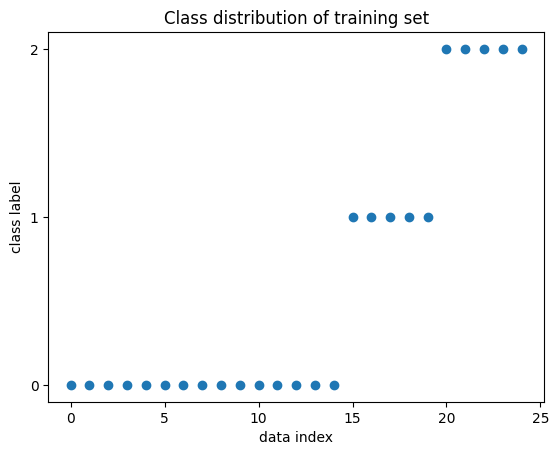

In [127]:
##### DO NOT CHANGE #####
# plotting class distribution of training set

fig, ax = plt.subplots()
ax.scatter(np.arange(0, len(y_train), 1), y_train)
plt.yticks(np.arange(0, 3, 1))
ax.set_xlabel("data index")
ax.set_ylabel("class label")
ax.set_title("Class distribution of training set")
plt.show()

##### DO NOT CHANGE #####

For the training, let's do the normal linear regression and ridge regression side by side, with `J_train`, `J_val` recording linear regression training/validation MSE, and `J_train_ridge`, `J_val_ridge` recording ridge regression MSE. Please implement them in the same `for` loop.

In [128]:
##### DO NOT CHANGE #####
# initializing parameters

np.random.seed(0)
omegaT = np.random.randn(5,1)
epochs = 3000 # number of updates to the weight
alpha = 0.0005 # learning rate
lam = 0.5 # coefficient of L2 penalty
J_train = np.zeros(epochs) # record MSE of training process (without L2 penalty)
J_val = np.zeros(epochs) # record MSE of validation process (without L2 penalty)
J_train_ridge = np.zeros(epochs) # record MSE of training process (with L2 penalty)
J_val_ridge = np.zeros(epochs) # record MSE of validation process (with L2 penalty)

##### DO NOT CHANGE #####

In [129]:
# Task 11: implement training process with L2 regularization. (3 points in total)

omega_norm = np.copy(omegaT) # weight vector for training without L2 penalty
omega_ridge = np.copy(omegaT) # weight vector for ridge regression

for i in range(epochs):

    # For each epoch, record the MSE for the training and validation process - first using the normal
    # weight update function and then using the ridge regression weight update function.

    # please update this in your solution
    J_val[i] = mean_square_error(x_val, y_val, omega_norm)
    J_train[i] = mean_square_error(x_train, y_train, omega_norm)
    omega_norm = weight_update_function(x_train, y_train, omega_norm, alpha)

    J_val_ridge[i] = mean_square_error_ridge(x_val, y_val, omega_ridge, lam)
    J_train_ridge[i] = mean_square_error_ridge(x_train, y_train, omega_ridge, lam)
    omega_ridge = weight_update_function_ridge(x_train, y_train, omega_ridge, alpha, lam)

    # YOUR CODE HERE




In [130]:
##### DO NOT CHANGE #####
# ID: Train_Loop_Ridge-test_1 - possible points: 2

# Both the normal and the ridge regression training processes should converge after a sufficient
# number of epochs.
assert np.std(J_val[-10:]) <= 1e-3, (
    'The training process seems not to be converging. The variance within the later epochs is too high.'
)
assert np.std(J_val_ridge[-10:]) <= 1e-3, (
    'The training process seems not to be converging. The variance within the later epochs is too high.'
)


##### DO NOT CHANGE #####

In [131]:
##### DO NOT CHANGE #####
# ID: Train_Loop_Ridge-test_2 - possible points: 1

# Hidden tests will check if the ridge regression training process has efficiently reduced the
# training/validation gap.


##### DO NOT CHANGE #####

Now we plot the training curves again, but this time on a log-log scale to better see the differences:

In [132]:
##### DO NOT CHANGE #####
# defining function

def plot_training_curve_ridge(mse_train, mse_val, mse_train_ridge, mse_val_ridge, epochs):
    """
    Plot the mean squared error for training/validation process.

    Args:
        mse_train (numpy.ndarray): array of shape (epochs, ) which records the
            mean squared error for training process.
        mse_val (numpy.ndarray): array of shape (epochs, ) which records the
            mean squared error for validation process.
        mse_train_ridge (numpy.ndarray): array of shape (epochs, ) which records the
            mean squared error for training process with L2 penalty.
        mse_val_ridge (numpy.ndarray): array of shape (epochs, ) which records the
            mean squared error for validation process with L2 penalty.
        epochs (int): number of epochs.

    Returns:
        None
    """

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].loglog(np.arange(epochs), mse_train, label='Training')
    ax[0].loglog(np.arange(epochs), mse_val, label='Validation')
    ax[0].set_ylabel("Mean Squared Error")
    ax[0].set_xlabel("Epochs")
    ax[0].set_title("Without L2 Regularization")
    ax[0].legend(loc='upper right')

    ax[1].loglog(np.arange(epochs), mse_train_ridge, label='Training')
    ax[1].loglog(np.arange(epochs), mse_val_ridge, label='Validation')
    ax[1].set_ylabel("Mean Squared Error")
    ax[1].set_xlabel("Epochs")
    ax[1].set_title("With L2 Regularization")
    ax[1].legend(loc='upper right')
    plt.show()

##### DO NOT CHANGE #####

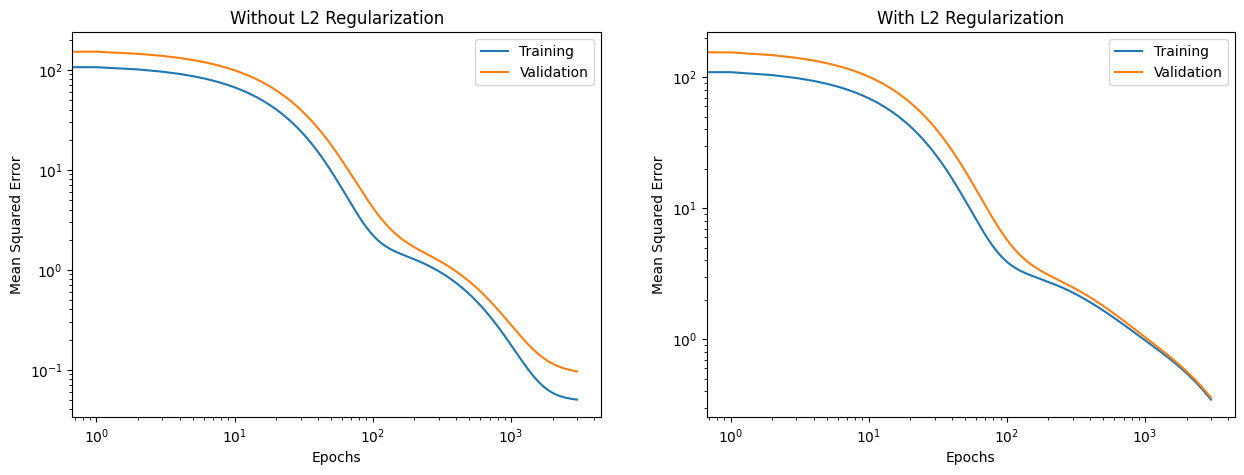

In [133]:
##### DO NOT CHANGE #####
# plotting results

plot_training_curve_ridge(J_train, J_val, J_train_ridge, J_val_ridge, epochs)

##### DO NOT CHANGE #####

In [134]:
# Task 12: as you did in the first part, stack to X a new column with value 1 (using np.hstack for example).
# (1 point in total)

# Update feature matrix X with x0 = 1
X: np.ndarray = np.hstack((np.ones((X.shape[0], 1)), X))
# YOUR CODE HERE


Y_pred = prediction(X, omega_norm)
Y_pred_ridge = prediction(X, omega_ridge)
acc = accuracy(Y_pred, Y)
acc_ridge = accuracy(Y_pred_ridge, Y)
print(acc)
print(acc_ridge)

0.8066666666666666
0.94


In [135]:
##### DO NOT CHANGE #####
# ID: Add_bias_term_to_X2-test - possible points: 1

# 1 point for correct shape of X after stacking

# now the shape of x_train should change from (150, 4) to (150, 5)
assert X.shape == (150, 5)

##### DO NOT CHANGE #####

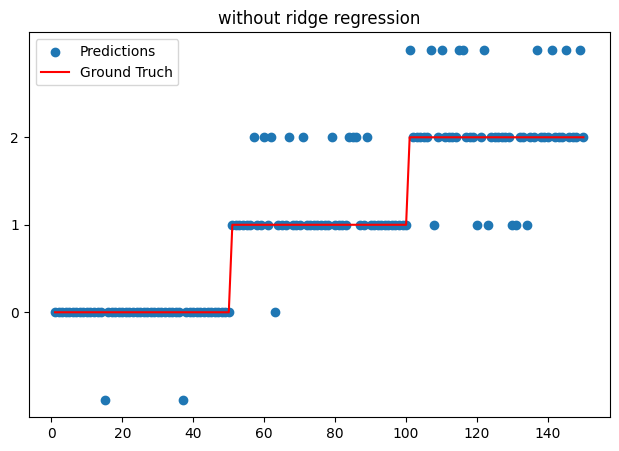

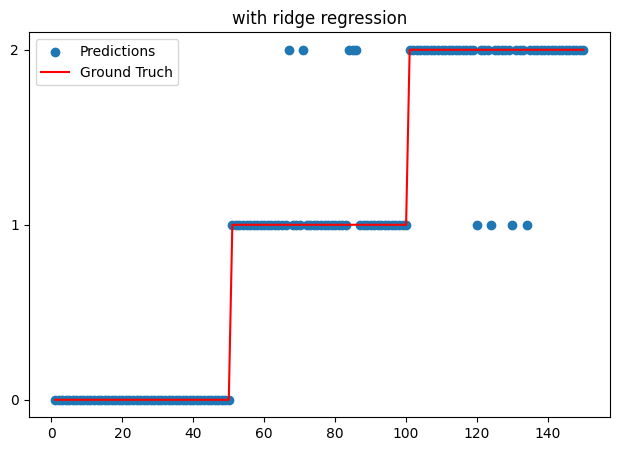

In [137]:
##### DO NOT CHANGE #####
# plotting class distribution labels

def plot_predict_vs_real(Y_pred, Y, title='plot'):
    """Plot the predictions vs ground truch"""
    fig, ax = plt.subplots(figsize=(7.5, 5))
    ax.scatter(np.arange(1, 151, 1), Y_pred, label='Predictions')
    ax.plot(np.arange(1, 151, 1), Y, label='Ground Truch', color='red')
    ax.set_title(title)
    ax.legend(loc="upper left")
    plt.yticks(np.arange(0, 3, 1))
    plt.show()

plot_predict_vs_real(Y_pred, Y, title='without ridge regression')
plot_predict_vs_real(Y_pred_ridge, Y, title='with ridge regression')

##### DO NOT CHANGE #####

**Yes or No question:** from the plots/accuracy calculations, do you think the ridge regression improved the learning performance? You should answer with a string "Yes" or "No".

In [139]:
# Task 13: answer the question. (2 points in total)

answer: str = "Yes"

# YOUR CODE HERE


In [140]:
##### DO NOT CHANGE #####
# ID: Ridge_question-test - possible points: 2

assert isinstance(answer, str), (
    "Your answer has to be a string!"
)

answer_lower = answer.lower()
assert answer_lower in ['yes', 'no'], (
    "Your answer has to be one of the available options!"
)

# Hidden test will check the correct answer.


##### DO NOT CHANGE #####

## Scipy Optimize

Rather than handcraft the Gradient Descent algorithm, there are libraries that can do the optimization task automatically. The `minimize()` function provided by SciPy library is a good example. It takes as input a reference to the function `fun` that needs to be minimized, the initial point `x0` where the search starts and (optionally) the name `method` of a specific search algorithm. It returns an `OptimizeResult` object that contains details of the optimization result. Below is an example of using `minimize()` function to optimize our linear model.

In [141]:
##### DO NOT CHANGE #####
from scipy.optimize import minimize

np.random.seed(0)
omega = np.random.randn(1,5)

def mean_square_error_2(omega):
    return (1/(2*len(X)) * np.sum((np.dot(X, omega.reshape(1,5).T) - Y) ** 2 ))


res = minimize(
    fun=mean_square_error_2,
    x0=omega.flatten(),
    method='L-BFGS-B'
)

print('optimization result:')
print(res)

omega_optimal = np.array(res.x).reshape(5,1)

##### DO NOT CHANGE #####

optimization result:
  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.02319254420007533
        x: [ 1.921e-01 -1.097e-01 -4.424e-02  2.270e-01  6.099e-01]
      nit: 13
      jac: [-8.965e-06 -5.406e-05 -2.652e-05 -3.828e-05 -1.276e-05]
     nfev: 102
     njev: 17
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


In [142]:
##### DO NOT CHANGE #####
Y_pred = prediction(X, omega_optimal)
acc = accuracy(Y_pred, Y)
acc

##### DO NOT CHANGE #####

np.float64(0.9733333333333334)

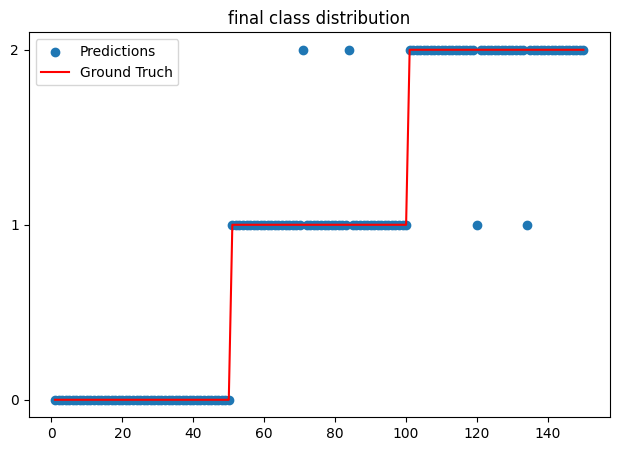

In [143]:
##### DO NOT CHANGE #####
plot_predict_vs_real(Y_pred, Y, 'final class distribution')

##### DO NOT CHANGE #####

You can find a good tutorial of SciPy optimization [here](https://machinelearningmastery.com/function-optimization-with-scipy/).  

If you have more questions, please refer to the SciPy [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html).

For the introduction of the "L-BFGS-B" search algorithm using here, please read [this](http://sepwww.stanford.edu/data/media/public/docs/sep117/antoine1/paper_html/node6.html).

***If you want to play around with this library, please do this in a separate notebook that is not submitted!***

Thank you very much for participating in the exercise!